In [1]:
import aocd
import networkx as nx
from itertools import pairwise
from functools import cache

In [2]:
def add_edges(G: nx.Graph, button, down=None, left=None, right=None, up=None):
    if down:
        G.add_edge(button, down, label='v')
    if left:
        G.add_edge(button, left, label='<')
    if right:
        G.add_edge(button, right, label='>')
    if up:
        G.add_edge(button, up, label='^')

    +---+---+---+
    | 7 | 8 | 9 |
    +---+---+---+
    | 4 | 5 | 6 |
    +---+---+---+
    | 1 | 2 | 3 |
    +---+---+---+
        | 0 | A |
        +---+---+

In [3]:

numpad = nx.DiGraph()
add_edges(numpad, 'A', left='0', up='3')
add_edges(numpad, '0', right='A', up='2')

add_edges(numpad, '1', right='2', up='4')
add_edges(numpad, '2', down='0', left='1', right='3', up='5')
add_edges(numpad, '3', down='A', left='2', up='6')

add_edges(numpad, '4', down='1', right='5', up='7')
add_edges(numpad, '5', down='2', left='4', right='6', up='8')
add_edges(numpad, '6', down='3', left='5', up='9')

add_edges(numpad, '7', down='4', right='8')
add_edges(numpad, '8', down='5', left='7', right='9')
add_edges(numpad, '9', down='6', left='8')

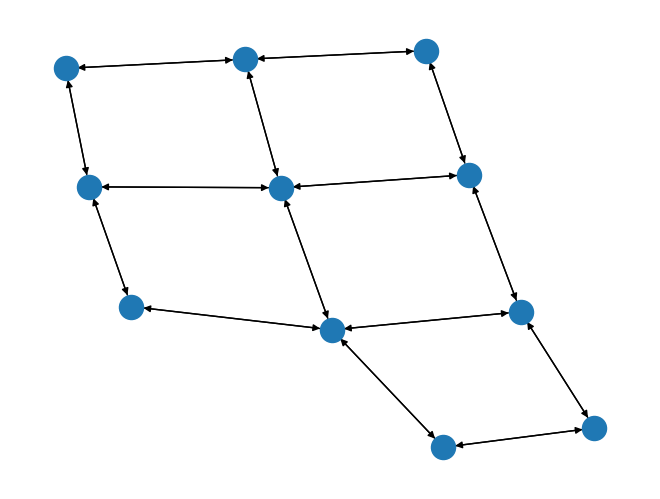

In [4]:
nx.draw(numpad)

        +---+---+
        | ^ | A |
    +---+---+---+
    | < | v | > |
    +---+---+---+

In [5]:
dirpad = nx.DiGraph()
add_edges(dirpad, 'A', down='>', left='^')
add_edges(dirpad, '^', down='v', right='A')
add_edges(dirpad, '<', right='v')
add_edges(dirpad, 'v', left='<', right='>', up='^')
add_edges(dirpad, '>', left='v', up='A')

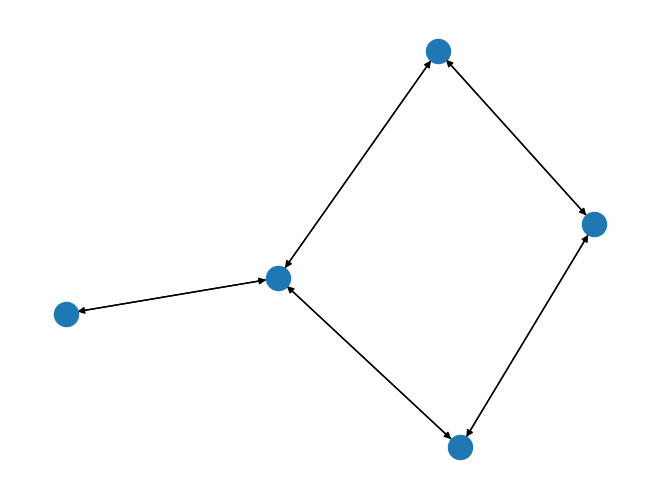

In [6]:
nx.draw(dirpad)

In [7]:
def path_to_sequence(G, path):
    return ''.join(G[u][v]['label'] for u, v in pairwise(path))

@cache
def shortest_sequence(pad, button1, button2, indirections):
    paths = nx.all_shortest_paths(pad, button1, button2)
    sequences = (path_to_sequence(pad, path) + 'A' for path in paths)
    if not indirections:
        return min(len(seq) for seq in sequences)
    else:
        return min(shortest_control_sequence(dirpad, seq, indirections-1) for seq in sequences)

def shortest_control_sequence(pad, target_sequence, indirections):
    sub_sequences = pairwise('A' + target_sequence)
    return sum(shortest_sequence(pad, button1, button2, indirections) for button1, button2 in sub_sequences)

def complexity(code, indirections):
    return shortest_control_sequence(numpad, code, indirections) * int(code[:-1])

In [8]:
codes = aocd.get_data(day=21, year=2024).splitlines()

print("Part 1:", sum(complexity(code,  2) for code in codes))
print("Part 2:", sum(complexity(code, 25) for code in codes))

Part 1: 138764
Part 2: 169137886514152
